## <center> Графические возможности библиотеки seaborn
    

In [1]:
import pandas as pd
#используем объединенный датасет о заболеваемости и вакцинации
covid_df = pd.read_csv('data/covid_df.csv', sep=';') 
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


`Seaborn` - надстройка над библиотекой `matplotlib`, которая значительно расширяет ее возможности, позволяя создавать графики более высокого уровня с приятным для глаза оформлением. Библиотека дает большое количество дополнительных возможностей для творчества при визуализации данных.

In [2]:
#!pip install seaborn

Традиционно `seaborn` импортируется под псевдонимом `sns`:

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.__version__

'0.12.2'

В данном разделе мы будем сравнивать несколько стран: Россию, Австралию, Германию, Канаду и Великобританию. Создадим специальный `DataFrame croped_covid_df` для этих данных. 

Для того, чтобы показатели по странам стали сопоставимы: добавим информацию о населении стран, чтобы рассчитать ежедневную заболеваемость на 100 человек населения (заболеваемость в процентах от населения):

⭐ А теперь снова немного магии `Feature Engineering`, чтобы показатели по странам стали сопоставимыми: добавим информацию о населении стран, чтобы рассчитать ежедневную заболеваемость на 100 человек — заболеваемость в процентах от общего количества населения (`daily_confirmed_per_hundred`).

In [4]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()


,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


Начнем с гистограммы. Для визуализации гистограмм в библиотеке seaborn используется метод `histplot()`.
У данного метода (как и у всех в библиотеке `seaborn`) есть огромнейшее количество параметров. Мы приведем основные из них:
* `data` - DataFrame, по которому строим график
* `x` - признак, который будет отложен по оси абсцисс
* `y` - признак, который будет отображаться по оси ординат
* `hue` - группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит его использовать для гистограмм, но он широко используется для других видов графиков в `seaborn`)
* `ax` - система координат `matplotlib`, в которой строится график
* `color`- цвет графика


* `bins` - число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул)
* `kde` - параметр указывает, сглаживать ли гистограмму кривой (по умолчанию `False`)



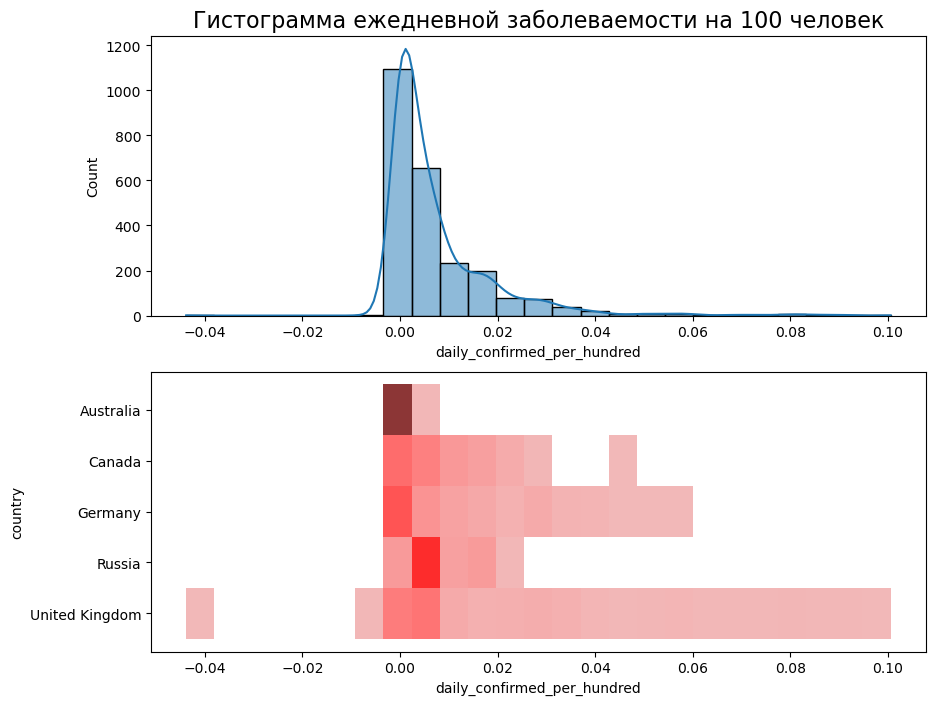

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);


Построим коробчатые диаграммы признака летальности (`death_rate`), который вы создавали ранее

Коробчатые диаграммы в seaborn строятся с помощью метода `boxplot()`.
Ящики отразим горизонтально (для этого по оси x отложим признак летальности, а по оси y - страны), параметр `orient` отвечает за ориентацию диаграммы, а `width` - за ширину коробок:


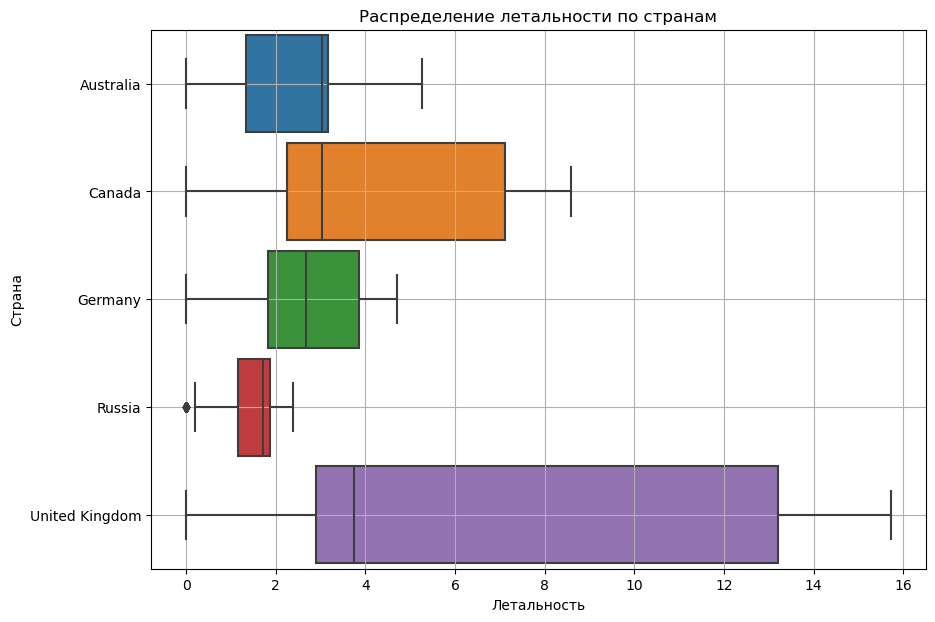

In [6]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()


А теперь рассмотрим пример многоуровневой столбчатой диаграммы. С помощью нее мы можем, например, посмотреть на средний ежедневный процент заболевших в странах по кварталам.

Для построения столбчатых диаграмм в seaborn используется метод `barplot()`. По умолчанию метод отображает среднее по столбцу, который указан в параметре x (вместо среднего можно вычислить и любую другую статистическую характеристику, наименование которой задается в параметре `estimator`). Для добавления многоуровневости используется параметр hue, который позволяет группировать данные по признаку


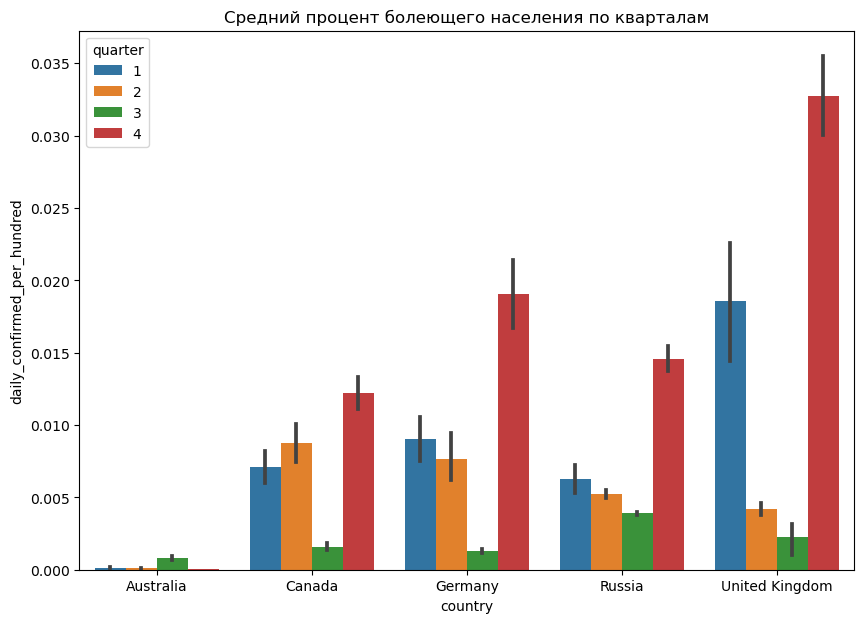

In [7]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');


Построим joinplot на зависимость ежедневной заболеваемости в странах в проценте от населения (`daily_confirmed_per_hundred`) от числа полностью вакцинированных (`people_fully_vaccinated_per_hundred`) 
Параметры `xlim` и `ylim` определяют диапазон отображения осей x и y. Параметр `height` отвечает за высоту и ширину графика (он квадратный).


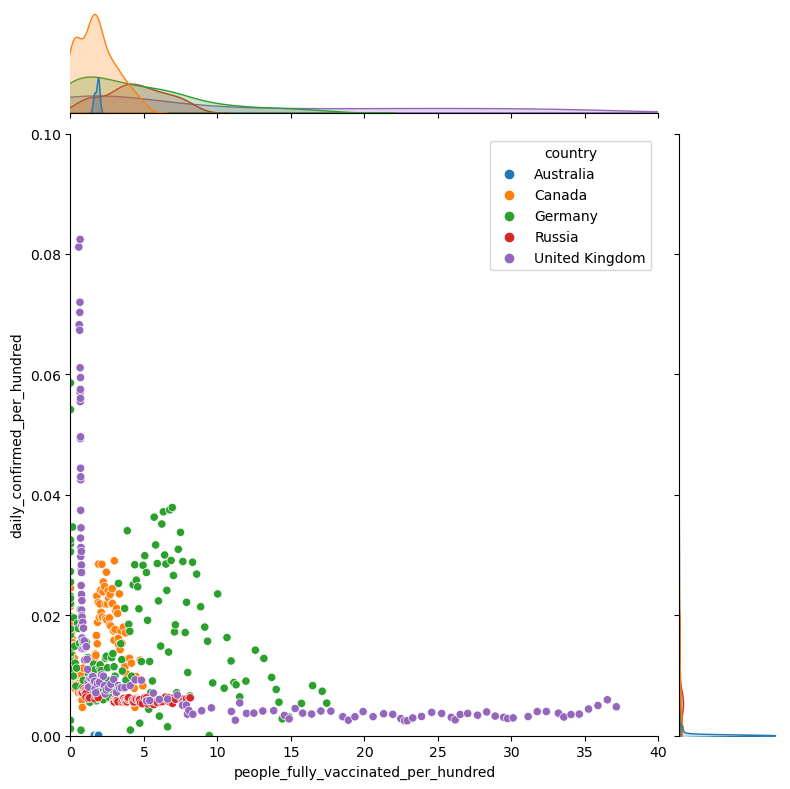

In [8]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае по странам их у нас их всего 5) нагляднее всего будет тепловая карта.

Предварительно создадим сводную таблицу: по столбцам отложим признак даты, а по строкам - страны, в ячейках таблицы будет находиться процент вакцинированных людей (1 ым компонентом) в стране на определенный день. Для того, чтобы даты отображались на тепловой карте верно, их необходимо привести к типу "`string`".


In [9]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


Для построения тепловой карты в `seaborn` используется метод `heatmap()`. Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета. Параметр `cmap` за цветовую гамму графика.


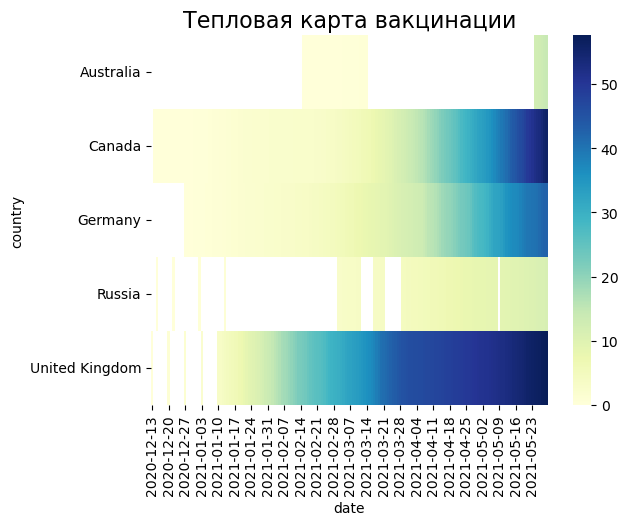

In [10]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

---

### Задание 6.4

Создайте новый признак `confirmed_per_hundred`, который покажет процентное отношение заболевших вирусом к общему числу населения в странах (`confirmed / population`).
Постройте тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (`confirmed_per_hundred`) в странах из таблицы `croped_covid_df`.

In [13]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100

In [14]:
croped_covid_df.head(3)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,...,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred,quarter,confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN,1,0.000000
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016,1,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000,1,0.000016


In [29]:
pivot_confirmed = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
pivot_confirmed.columns = pivot_confirmed.columns.astype('string')
fig = plt.figure(figsize=(10, 5))
display(pivot_confirmed)

date,2020-01-23,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.000016,0.000016,0.000019,0.000019,0.000019,0.000035,0.000035,0.000047,0.000047,...,0.116606,0.116621,0.116637,0.116683,0.116722,0.116788,0.116854,0.116897,0.116932,0.116983
Canada,NaN,NaN,0.000003,0.000003,0.000005,0.000005,0.000008,0.000008,0.000011,0.000011,...,3.599497,3.611526,3.620169,3.628017,3.632706,3.642529,3.648718,3.661252,3.669520,3.675536
Germany,NaN,NaN,NaN,NaN,0.000005,0.000005,0.000005,0.000006,0.000010,0.000012,...,4.345962,4.355632,4.363299,4.368845,4.371625,4.374704,4.380047,4.388347,4.395716,4.401106
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,0.000001,0.000001,...,3.368999,3.375035,3.380916,3.386963,3.392637,3.397954,3.403604,3.409708,3.415960,3.422232
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000003,0.000003,0.000003,...,6.594230,6.598223,6.601946,6.605033,6.608528,6.612093,6.616504,6.621495,6.627439,6.632219


<Figure size 1000x500 with 0 Axes>

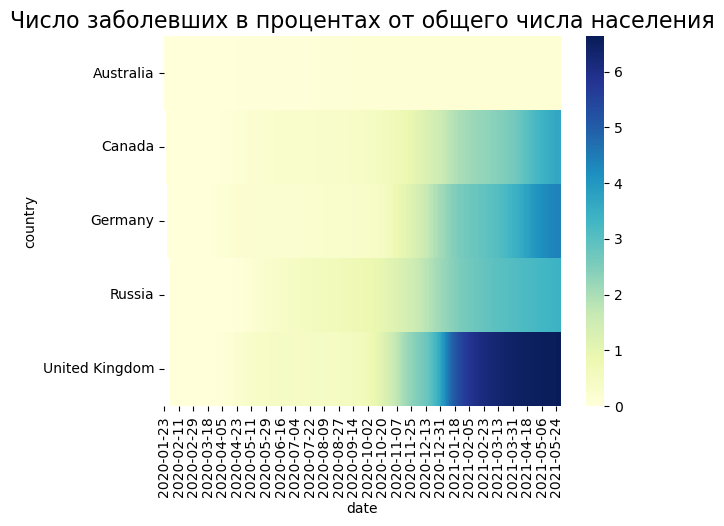

In [31]:
heatmap = sns.heatmap(data=pivot_confirmed, cmap='YlGnBu')
heatmap.set_title('Число заболевших в процентах от общего числа населения', fontsize=16);

### Задание 6.5

Постройте коробчатую диаграмму для признака `recover_rate` (отношение выздоровлений к числу зафиксированных случаев заболевания в процентах).

In [32]:
croped_covid_df.head(3)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,...,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred,quarter,confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN,1,0.000000
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016,1,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000,1,0.000016


In [ ]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()